# Feature Engineering

In this notebook we will be exploring diffrent ways to enhance the information received by feature engineering

## Importing Libraries


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Importing our Data set

In [2]:
data= pd.read_csv("Dataset/energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

## Feature Engineering From Date-Time Column

### Converting Date into Date Time format from String

In [4]:
# Convert argument to datetime
data["date_time"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_time
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


### Determining The Day of the Week

In [7]:
def dayoftheweek(day):
    if(day==0):
        return("Monday")
    if(day==1):
        return("Tuesday")
    if(day==2):
        return("Wednesday")
    if(day==3):
        return("Thurday")
    if(day==4):
        return("Friday")
    if(day==5):
        return("Saturday")
    if(day==6):
        return("Sunday")

In [8]:
data["dayoftheweek"] = data['date_time']
data["dayoftheweek"] = data['dayoftheweek'].apply(lambda x: dayoftheweek(x.dayofweek))
data.groupby('dayoftheweek').count()["date_time"]

dayoftheweek
Friday       2845
Monday       2778
Saturday     2736
Sunday       2736
Thurday      2880
Tuesday      2880
Wednesday    2880
Name: date_time, dtype: int64

## Adding Weekday or Weekend Column

In [9]:
def weekdaytype(day):
    if(day=="Saturday" or day == "Sunday"):
        return "weekend"
    else:
        return "Weekday"

In [10]:
data["WeekDayType"] = data["dayoftheweek"]
data["WeekDayType"] = data['WeekDayType'].apply(lambda x: weekdaytype(x))
data.groupby('WeekDayType').count()["date_time"]

WeekDayType
Weekday    14263
weekend     5472
Name: date_time, dtype: int64

## Adding Day or Night
Considering Sun Rise and Sun Set

In [11]:
def partOfTheDay(time):
    day1 = pd.to_datetime('18:00:00',format="%H:%M:%S")
    day2 = pd.to_datetime('6:00:00',format="%H:%M:%S")
    if(time<day1.time() and time >= day2.time()):
        return "Day"
    else:
        return "Night"

In [12]:
data['timeofDay'] = data["date_time"].map(lambda x: partOfTheDay(x.time()))

In [13]:
data.groupby('timeofDay').count()["date_time"]

timeofDay
Day      9870
Night    9865
Name: date_time, dtype: int64

### Adding Active Hours
The time when human activity is present

In [14]:
def awakeTest(time):
    day1 = pd.to_datetime('8:00:00',format="%H:%M:%S")
    day2 = pd.to_datetime('22:00:00',format="%H:%M:%S")
    if(time>=day1.time() and time < day2.time()):
        return "awake"
    else:
        return "sleep"

In [15]:
data['activeStatus'] = data["date_time"].map(lambda x: awakeTest(x.time()))

In [16]:
data.groupby('activeStatus').count()["date_time"]

activeStatus
awake    11515
sleep     8220
Name: date_time, dtype: int64

### Adding Minutes to Midnight Column
from 12am to 12pm (minutes)

In [17]:
data['NSM'] = pd.to_datetime(data['date_time'])
data['NSM']  = (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second
data['NSM'].head()

0    61200
1    61800
2    62400
3    63000
4    63600
Name: NSM, dtype: int64

### Adding Week of the year

In [18]:
data["weekOfTheYear"] = data['date_time'].apply(lambda x: x.isocalendar()[1])
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Tdewpoint,rv1,rv2,date_time,dayoftheweek,WeekDayType,timeofDay,activeStatus,NSM,weekOfTheYear
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,5.300000,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,Day,awake,61200,2
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,5.200000,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,Day,awake,61800,2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,5.100000,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,Day,awake,62400,2
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,5.000000,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,Day,awake,63000,2
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,4.900000,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,Day,awake,63600,2
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,4.800000,44.919484,44.919484,2016-01-11 17:50:00,Monday,Weekday,Day,awake,64200,2
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,4.700000,47.233763,47.233763,2016-01-11 18:00:00,Monday,Weekday,Night,awake,64800,2
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,4.683333,33.039890,33.039890,2016-01-11 18:10:00,Monday,Weekday,Night,awake,65400,2
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,4.666667,31.455702,31.455702,2016-01-11 18:20:00,Monday,Weekday,Night,awake,66000,2
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,4.650000,3.089314,3.089314,2016-01-11 18:30:00,Monday,Weekday,Night,awake,66600,2


### Adding Season

In [19]:
from datetime import date, datetime
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]
def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(data['date_time'][19734]))

spring


In [20]:
data['season'] = data['date_time'].apply(lambda x: get_season(x))
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,date_time,dayoftheweek,WeekDayType,timeofDay,activeStatus,NSM,weekOfTheYear,season
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,Day,awake,61200,2,winter
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,Day,awake,61800,2,winter
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,Day,awake,62400,2,winter
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,Day,awake,63000,2,winter
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,Day,awake,63600,2,winter
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,44.919484,44.919484,2016-01-11 17:50:00,Monday,Weekday,Day,awake,64200,2,winter
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,47.233763,47.233763,2016-01-11 18:00:00,Monday,Weekday,Night,awake,64800,2,winter
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,33.039890,33.039890,2016-01-11 18:10:00,Monday,Weekday,Night,awake,65400,2,winter
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,31.455702,31.455702,2016-01-11 18:20:00,Monday,Weekday,Night,awake,66000,2,winter
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,3.089314,3.089314,2016-01-11 18:30:00,Monday,Weekday,Night,awake,66600,2,winter


In [24]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Day,Month, parameter1, parameter2,save):
    new_data = data[(data['date_time'].map(lambda x: x.day) == Day) & (data['date_time'].map(lambda x: x.month) == Month)]
    plt.subplot(211)
    title = "Plot of "+parameter1+" and " +parameter2+" vs time"
    plt.title("Plot of "+parameter1+" and " +parameter2+" vs time" ) 
    plt.plot(new_data['date_time'].map(lambda x: x.hour), new_data[parameter1])
    plt.xlabel("Time") 
    plt.ylabel(parameter1)
    plt.subplot(212) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter2])
    plt.ylabel(parameter2)
    plt.xlabel("Time")
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show
    try:
        return print("Correlation between ",parameter1," and ",parameter2,"is",str(new_data[parameter1].corr(new_data[parameter2])))
    except:
        return print("No Correlation Between data types")
interact(day_visual,Day=day_date,Month=month_date, parameter1 = list(data),parameter2 = list(data), save=save)


interactive(children=(Dropdown(description='Day', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31), value=1), Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameter1', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'date_time', 'dayoftheweek', 'WeekDayType', 'timeofDay', 'activeStatus', 'NSM', 'weekOfTheYear', 'season'), value='date'), Dropdown(description='parameter2', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'date_time', 'dayoftheweek', 'WeekDayType', 'timeofDay', 'activeStatus', 'NSM', 'weekOfTheYear', 'season'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

In [22]:
data.to_csv("new_data_feature.csv",index =False)

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Checkbox(value=False, description='T1'), Checkbox(value=False, description='T2'), Checkbox(value=False, description='T3'), Checkbox(value=False, description='T4'), Checkbox(value=False, description='T5'), Checkbox(value=False, description='T6'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

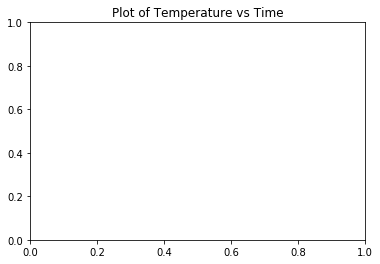

In [23]:
%matplotlib inline
month_date = range(1, 6)
save = {False,True}
def day_visual(Month, T1,T2,T3,T4,T5,T6,save):
    new_data = data[(data['date_time'].map(lambda x: x.month) == Month)]
    title = "Plot of Temperature"+" vs " +"Time"
    plt.title(title) 
    plt.plot(new_data['date'].map(lambda x: (x.timetuple().tm_yday*24*60*60)),new_data['T1'])
    plt.xlabel("Time") 
    
    plt.ylabel("Temperature")
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(day_visual,Month=month_date,T1=False,T2=False,T3=False,T4=False,T5=False,T6=False, save=save)